<div align="center">
    <font size=5> <b> MSDS 7333 Spring 2021: Case Study 06 </b></font>
</div>
<br>
<div align="center">
    <font size=3> <b> Classification  Using Neural Networks </b> </font>
</div>

<br>
<div align="center">
    <font size=3> <b> Sachin Chavan,Tazeb Abera, Gautam Kapila, Sandesh Ojha </b> </font>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-1">Import Modules</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-3">Business Understanding</a></span></li><li><span><a href="#Data-Exploration-&amp;-Quality" data-toc-modified-id="Data-Exploration-&amp;-Quality-4">Data Exploration &amp; Quality</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4.1">Load Data</a></span></li><li><span><a href="#DataFrame" data-toc-modified-id="DataFrame-4.2">DataFrame</a></span></li><li><span><a href="#Distribution-of-features" data-toc-modified-id="Distribution-of-features-4.3">Distribution of features</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.4">Heatmap</a></span></li><li><span><a href="#More-on-Data-Quality" data-toc-modified-id="More-on-Data-Quality-4.5">More on Data Quality</a></span></li><li><span><a href="#Sampled-Data" data-toc-modified-id="Sampled-Data-4.6">Sampled Data</a></span></li></ul></li><li><span><a href="#Architecture" data-toc-modified-id="Architecture-5">Architecture</a></span><ul class="toc-item"><li><span><a href="#Vanishing-gradient-problem" data-toc-modified-id="Vanishing-gradient-problem-5.1">Vanishing gradient problem</a></span></li><li><span><a href="#Initial-NN-setup" data-toc-modified-id="Initial-NN-setup-5.2">Initial NN setup</a></span></li><li><span><a href="#Build-Deep-Neural-Network" data-toc-modified-id="Build-Deep-Neural-Network-5.3">Build Deep Neural Network</a></span></li></ul></li><li><span><a href="#Recommendation-&amp;-Evaluations" data-toc-modified-id="Recommendation-&amp;-Evaluations-6">Recommendation &amp; Evaluations</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7">Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8">References</a></span></li></ul></div>

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Introduction

This case study is about using neural networks for classification problem with the Higgs Boson dataset. The dataset that contains observations of kinematic properties measured by particle detectors in accelerator [[1]](#References).Higgs Boson is the unusal kind of subautomic particle discovered by Scottish physicist Peter Higgs [[2]](#References). The mainstream media always referred this particle as God particle after launch of a book The God particle by Leon Lederman. This particles are produced by quantum excitation of Higgs field [[2]](#References).In 1964, Peter Higgs proposed a mechanism to explain why some particle have mass. There are several ways by which particle can attain a mass like by interacting with Higgs field. Higgs field exist just like gravitational or magnetic field that doesn't change [(P. Onyisi,2013)](#References). The experiment was carried out in year 2012 by ATLAS and CMS and they found subautomic particle have properties similar to explained by Higgs mechanism.

The dataset for this case study contains 11 million observations produced using Monte Carlo simulations and has observations of singal processes that produces Higgs Boson and background process that does not and shall be used to distinguish between signal processes and background process.So this is signal vs background classification problem.

     

# Business Understanding

Deep learning is a new area in Machine Learning that attempts to model high level abstractions present in the raw data to understand the high varying functions underlying the data and to perform well generalized predictions for unseen data. This is accomplished through certain non-linear transformations of data through varying deep architectures such as Neural Networks. Deep learning aims at fulfilling the objective of true Artificial Intelligence and has recently been of great interest to researchers in machine learning. Tech giants like Google, Microsoft, Facebook and Baidu are investing hundreds of millions of dollars in bleeding-edge deep learning research and developing its applications [[2]](#References).

As described in the paper (Baldi,2014) collisions at high energy particles are great source of finding exotic particles, basically these are classification problems and requires machine learning. Classical machine learning have limitations in learning non-linear patterns in the data and often requires features to be manually crafted and process is quite time consuming.However, Deep learning approach found to be more effective in reading and learning such non-linear structures and classifiying signals vs background processs more effectively compared to classical machine learning methods and that too witout manually crafting features as it is done in other modeling techniques.

This field deals with fast and high energy collision of particles and how they form and decay. The formation and decay of these Higgs Boson can be observed and recorded. In the paper “Searching for Exotic Particles in High-Energy Physics with Deep Learning,” published in 2014, the authors used deep learning with neural networks to classify “exotic particle(s)” that results in particle collision. The Higgs Boson data was collected from the Large Hadron Collider’s detectors. In the paper above, they focused on improving past research that used other machine learning techniques. The deep learning method they used was built using the library standards in 2014 and it outperformed the previous methods. The model was implemented using Pylearn2 which is no longer supported.





**Objective**

Build a neural network model similar to that implemented in the paper (Baldi,2014) using TensorFlow to effectively classify signal and background processes to find exotic particles to prove that NN outperforms other techniques.

# Data Exploration & Quality

The dataset was obtained from UCI website[[1]](#References). It contains data that was produced usign Monte Carlo simulations. Out of 21 features first 21 after target variables are low level kinematic properties measured by particle detectors and remaining 7 featuresa are function of 21 features.These are high level features as described on the UCI website. These are derived by physicists for the purpose of classification specially for deep learning. This eliminates the need for manually crafting feautre for data modeling. This data does not contain any missing values as indicated by the website.

## Load Data
Here 50 records are randomly sampled from this huge dataset.

In [2]:
#number of records in file (excludes header)
#Random sample of 50K records from the dataset 
random.seed(10)
filename = "data/HIGGS.csv"
n = sum(1 for line in open(filename)) - 1 
s = 500000 
skip = sorted(random.sample(range(1,n+1),n-s)) 
higgs_ds = pd.read_csv(filename,header=None,skiprows=skip)

## DataFrame

* First column is target variable 1 for signal and 0 for background followed by 28 features.
* next 21 features are low level features
* remaining 7 features are high level features.

In [3]:
features = ['target','lepton_pT','lepton_eta','lepton_phi','missing_energy_magnitude','missing_energy_phi',
'jet_1pt','jet_1eta','jet_1phi','jet_1b-tag','jet_2pt','jet_2eta','jet_2phi','jet_2b-tag',
'jet_3pt','jet_3eta','jet_3phi','jet_3b-tag','jet_4pt','jet_4eta','jet_4phi','jet_4b-tag',
'm_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']
higgs_ds.rename(columns=dict(zip(higgs_ds.columns, features)),inplace=True)
higgs_ds

,target,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1pt,jet_1eta,jet_1phi,jet_1b-tag,...,jet_4eta,jet_4phi,jet_4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.205115,0.916450,-1.208732,0.354093,-0.705644,1.124387,1.044667,0.787374,0.000000,...,-0.889083,1.402656,0.000000,0.842202,0.653404,0.986041,0.499786,0.532321,0.580379,0.588988
3,0.0,0.608871,-0.521127,0.287280,0.649669,0.197985,0.511168,1.236772,-0.670184,2.173076,...,1.152167,0.677386,0.000000,0.432535,0.925063,0.983252,0.770114,1.497139,0.925299,0.730882
4,0.0,0.367665,-0.881496,0.232349,1.258956,1.728993,0.726262,0.981292,-0.303185,0.000000,...,1.871726,-0.460841,0.000000,0.806875,0.757239,0.987123,0.881511,0.625056,0.869624,1.198134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499996,0.0,1.343287,-0.557164,-1.376300,0.740613,-1.105498,0.544513,-0.217876,0.529035,0.000000,...,0.319343,-0.003594,3.101961,0.814111,0.905735,0.997263,0.702615,0.504248,0.704419,0.699645
499997,0.0,3.057899,-0.531841,0.764461,0.397572,0.094738,2.878665,-0.179257,-0.915218,0.000000,...,-1.014007,0.377179,0.000000,1.030930,0.802339,0.984593,0.873965,1.661635,1.609320,1.555179
499998,1.0,0.837450,-0.536711,0.285060,0.704771,-1.614450,0.771150,-0.611987,1.372240,2.173076,...,0.814873,-1.270461,3.101961,0.784877,0.783646,1.053911,0.736185,1.097180,0.929516,0.835774
499999,0.0,0.419091,-0.685728,0.265085,1.403688,0.968891,0.801197,1.312029,-1.006136,0.000000,...,-0.646731,0.914334,0.000000,0.834974,1.309423,0.995134,1.075295,1.098666,1.072039,1.351958


In [4]:
higgs_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500001 entries, 0 to 500000
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   target                    500001 non-null  float64
 1   lepton_pT                 500001 non-null  float64
 2   lepton_eta                500001 non-null  float64
 3   lepton_phi                500001 non-null  float64
 4   missing_energy_magnitude  500001 non-null  float64
 5   missing_energy_phi        500001 non-null  float64
 6   jet_1pt                   500001 non-null  float64
 7   jet_1eta                  500001 non-null  float64
 8   jet_1phi                  500001 non-null  float64
 9   jet_1b-tag                500001 non-null  float64
 10  jet_2pt                   500001 non-null  float64
 11  jet_2eta                  500001 non-null  float64
 12  jet_2phi                  500001 non-null  float64
 13  jet_2b-tag                500001 non-null  f

## Distribution of features

Distribution of high level features is almost same. Skewness exists on feautures like lepton_phi,jet_2pt,jet_3pt and so on but all high level features shows skewness. Below two plot indicates dimensionality reduction may help to get unique features.

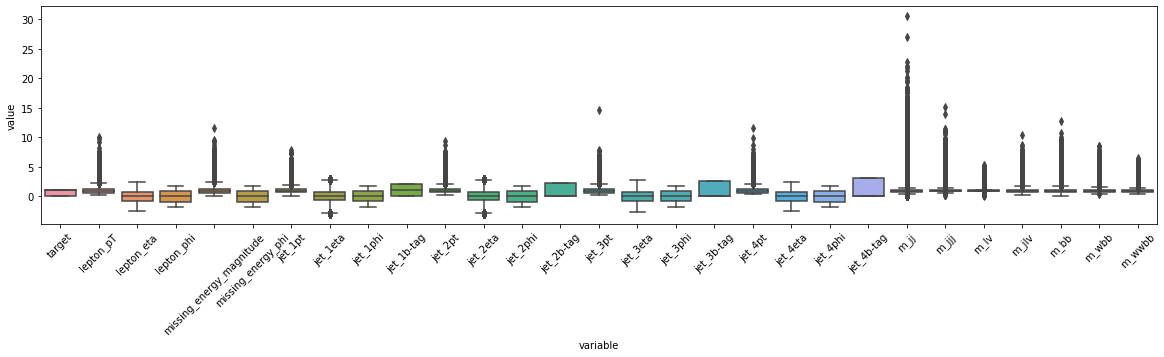

In [5]:
plt.figure(figsize=(20,4))
x=sns.boxplot(x="variable", y="value", data=higgs_ds.melt())
loc, labels = plt.xticks()
x.set_xticklabels(labels, rotation=45)
x

## Heatmap

There are more negatively correalted features compared to positively correalted.

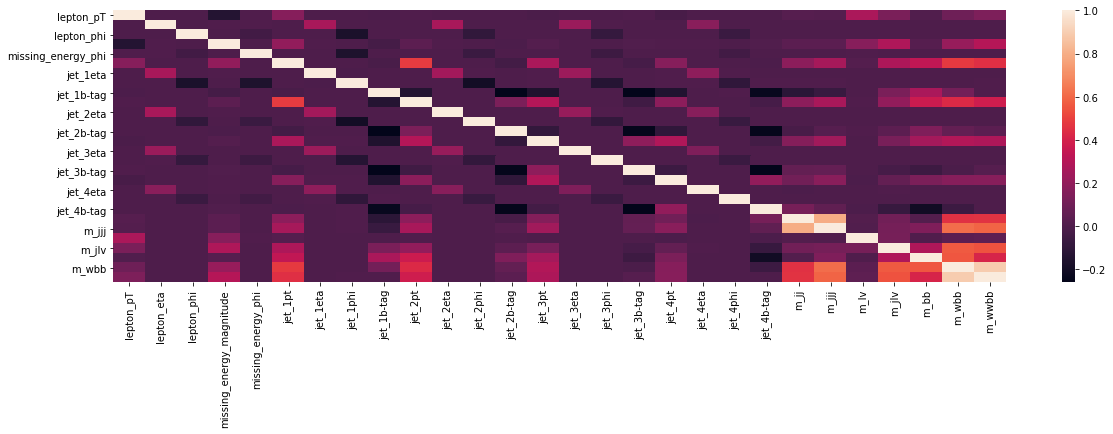

In [6]:
plt.figure(figsize=(20,5))
sns.heatmap(higgs_ds.iloc[:,1:].corr())

## More on Data Quality

The HIGGS data set is nearly balanced, with 52.99% positive examples, that’s why we did not perform subsampling or oversampling on the data.

|| label |count|%|
| --- | --- |--- | --- |
|signal| 1 |5829123| 52.99%|
|background| 0 | 5170877 | 47.01%|

The paper mentioned that various numbers of examples were used for different stages of their study.
 * Hyper-parameters selection: Using a subset of the HIGGS data consisting of 2.6 million training examples and 100,000 validation examples.
 * Hyper-parameters optimization: Using complete 11 million examples. 
 * Performance testing: Classifiers were tested on 500,000 simulated examples generated from the same Monte Carlo procedures as the training sets.
 
As the paper was published in 2014, the original study might be not thorough due to expensive computational cost. In this case study, the full dataset (11 million data) is used to build and validate models.


## Sampled Data 

Randomly sample data too has sample proportion of singal (52.96%) and background (47.04%) observations which is nearly balanced.

In [7]:
higgs_ds.groupby(['target']).size().reset_index(name='counts')

,target,counts
0,0.0,235091
1,1.0,264910


# Architecture

Prior to strated building the model, we studied the original arictecture stated in the paper. In this case study, we use TensorFlow to architect a Neural Network to replicate the results presented in [2]. We first load the HIGGS Data [1], explore data analysis and then split the data into train and test data sets (80/20). 

## Vanishing gradient problem

Vanishing gradient problem can be aleviated by following steps:

* Faster processing using GPUs to speed up stochastic gradient descent.
* larger training sets
* using dropout 
* Dimensionality reduction.




## Initial NN setup

Weights initialized from normal distribution with mean 0 and SDs as follows:

First Layer   - SD - 0.1

Hidden Layers - SD - 0.05

Output Layers - SD - 0.001

Mini Batches of size 100

Momentum for first 200 epochs - 0.9 to 0.99

Learning rate decayed by factor 1.0000002

## Build Deep Neural Network

Then we build the NN models and then attempt to optimize the hyperparameters like the number of layers, the number of neurons and the learning rate. We assigned the same initial learning rate used in the original paper and used the exponential decay learning rate method during the training of the model. We used AUC as a metric to measure the goodness of the NN models to perform an apple to apple comparison to the model found in [2]. Finally, we visualized AUC trends for both train and test data
and the learning rate decay curve through the model training process.


We used TensorFlow with Keras package to build our model. To replicate the original
model in the paper, we used the same hyperparameters from the paper as listed below.
* Neurons = 300 units per layer
* Number of Layers = 5 layers (4 Dense layers + 1 output layer)
* Activation Function = tanh for the Dense layers, sigmoid for output layer
* Initial Learning Rate = 0.05
* Learning Rate Decay = Exponential Decay
* Momentum = 0.9
* Metrics = AUC
* Epoch's = 20 (for all models) and 100 (for two first models)
* Batch Size = 100


......

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    np.array(higgs_ds.iloc[:,1:]), np.array(higgs_ds.iloc[:,0]), test_size=0.2, random_state=42)
print(' ')
print('Shape of the dataframe')
print('Train set',X_train.shape)
print('Test  set',X_test.shape)

 
Shape of the dataframe
Train set (400000, 28)
Test  set (100001, 28)


In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [145]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(300, activation='relu',name="h0",
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=.1)))
model.add(layers.Dense(300, activation='relu',name="h1",
          kernel_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=.05)))
model.add(layers.Dense(300, activation='relu',name="h2",
          kernel_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=.05)))
model.add(layers.Dense(300, activation='relu',name="h3",
          kernel_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=.05)))
model.add(layers.Dense(1, activation='sigmoid',name="y",
          kernel_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev= 0.001)))

In [146]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h0 (Dense)                   (None, 300)               8700      
_________________________________________________________________
h1 (Dense)                   (None, 300)               90300     
_________________________________________________________________
h2 (Dense)                   (None, 300)               90300     
_________________________________________________________________
h3 (Dense)                   (None, 300)               90300     
_________________________________________________________________
y (Dense)                    (None, 1)                 301       
Total params: 279,901
Trainable params: 279,901
Non-trainable params: 0
_________________________________________________________________


In [147]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=.000001,
    decay_steps=10000,
    decay_rate=1.0000002)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
opt = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [148]:
history= model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test), batch_size=100)

Train on 400000 samples, validate on 100001 samples
Epoch 1/30
400000/400000 [==============================] - 17s 42us/sample - loss: 0.6109 - acc: 0.6596 - val_loss: 0.5833 - val_acc: 0.6893
Epoch 2/30
400000/400000 [==============================] - 17s 42us/sample - loss: 0.5751 - acc: 0.6955 - val_loss: 0.5730 - val_acc: 0.7022
Epoch 3/30
400000/400000 [==============================] - 17s 42us/sample - loss: 0.5590 - acc: 0.7099 - val_loss: 0.5691 - val_acc: 0.6992
Epoch 4/30
400000/400000 [==============================] - 17s 43us/sample - loss: 0.5471 - acc: 0.7198 - val_loss: 0.5536 - val_acc: 0.7144
Epoch 5/30
400000/400000 [==============================] - 17s 43us/sample - loss: 0.5367 - acc: 0.7268 - val_loss: 0.5359 - val_acc: 0.7270
Epoch 6/30
400000/400000 [==============================] - 17s 43us/sample - loss: 0.5303 - acc: 0.7314 - val_loss: 0.5317 - val_acc: 0.7292
Epoch 7/30
400000/400000 [==============================] - 17s 43us/sample - loss: 0.5235 - acc

In [142]:
# evaluate the model
_,train_acc = model.evaluate(X_train, y_train)
_,test_acc  = model.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


100001/100001 [==============================] - 6s 59us/sample - loss: 0.6929 - acc: 0.5334
Train: 0.529, Test: 0.533


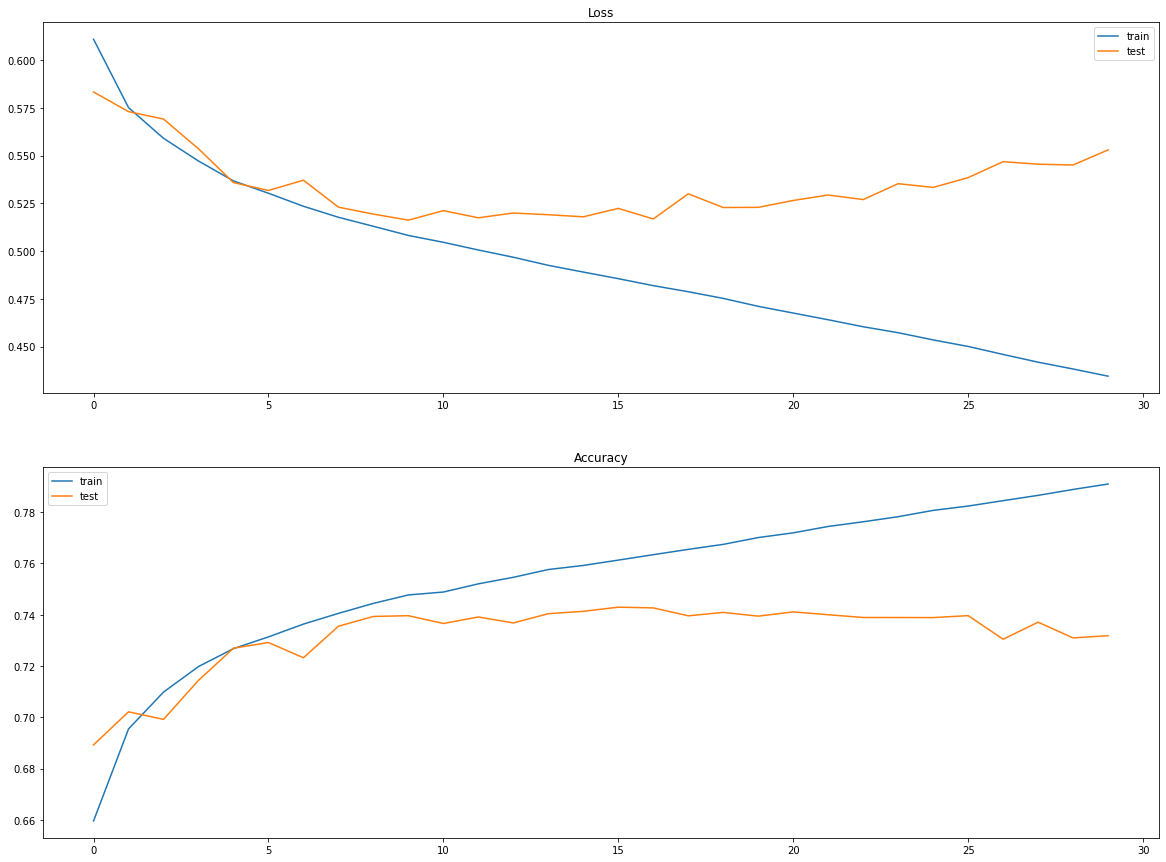

In [149]:
# plot loss during training
plt.figure(figsize=(20,15))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [98]:
history.history

{'loss': [7.223296924233437,
  7.2232969148159025,
  7.223296908974648,
  7.223296918749809,
  7.223296905875206],
 'acc': [0.5289125, 0.5289125, 0.5289125, 0.5289125, 0.5289125],
 'val_loss': [7.114613716953346,
  7.114613701694709,
  7.114613705032536,
  7.114613722198502,
  7.114613725870111],
 'val_acc': [0.53344464, 0.53344464, 0.53344464, 0.53344464, 0.53344464]}

In [88]:
y_train.shape

(400000,)

# Recommendation & Evaluations

# Conclusion

# References

1. [HIGGS DataSet - UCI- Website](https://archive.ics.uci.edu/ml/datasets/HIGGS)
2. P. Onyisi, Higgs boson FAQ, University of Texas ATLAS group, 2013.
3. Baldi, P., Sadowski, P. & Whiteson, D. Searching for exotic particles in high-energy physics with deep learning. Nat Commun 5, 4308 (2014). https://doi.org/10.1038/ncomms5308
